In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/Data/cats_and_dogs_filtered.zip

--2024-03-16 04:22:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/Data/cats_and_dogs_filtered.zip’

/content/Data/cats_ 100%[===================>]  65.43M  20.4MB/s    in 3.9s    

2024-03-16 04:22:40 (16.8 MB/s) - ‘/content/Data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [11]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Unzipping the file
local_zip = '/content/Data/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(local_zip)
zipref.extractall('/content/Data')

In [13]:
os.listdir('/content/Data/cats_and_dogs_filtered')

['train', 'vectorize.py', 'validation']

In [14]:
print(os.listdir('/content/Data/cats_and_dogs_filtered/train'))
print(os.listdir('/content/Data/cats_and_dogs_filtered/validation'))

['cats', 'dogs']
['cats', 'dogs']


In [15]:
print(os.listdir('/content/Data/cats_and_dogs_filtered/train/cats')[:5])
print(os.listdir('/content/Data/cats_and_dogs_filtered/validation/cats')[:5])

['cat.874.jpg', 'cat.610.jpg', 'cat.840.jpg', 'cat.246.jpg', 'cat.890.jpg']
['cat.2008.jpg', 'cat.2443.jpg', 'cat.2495.jpg', 'cat.2272.jpg', 'cat.2483.jpg']


In [16]:
base_dir = '/content/Data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [17]:
print('Number of training cat images   : ', len(os.listdir(train_cats_dir)))
print('Number of training dog images   : ', len(os.listdir(train_dogs_dir)))
print('Number of validation cat images : ', len(os.listdir(val_cats_dir)))
print('Number of validation dog images : ', len(os.listdir(val_dogs_dir)))

Number of training cat images   :  1000
Number of training dog images   :  1000
Number of validation cat images :  500
Number of validation dog images :  500


In [18]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])
print(os.listdir(val_cats_dir)[:5])
print(os.listdir(val_dogs_dir)[:5])

['cat.874.jpg', 'cat.610.jpg', 'cat.840.jpg', 'cat.246.jpg', 'cat.890.jpg']
['dog.38.jpg', 'dog.735.jpg', 'dog.754.jpg', 'dog.355.jpg', 'dog.981.jpg']
['cat.2008.jpg', 'cat.2443.jpg', 'cat.2495.jpg', 'cat.2272.jpg', 'cat.2483.jpg']
['dog.2153.jpg', 'dog.2011.jpg', 'dog.2408.jpg', 'dog.2077.jpg', 'dog.2448.jpg']


(-0.5, 499.5, 425.5, -0.5)

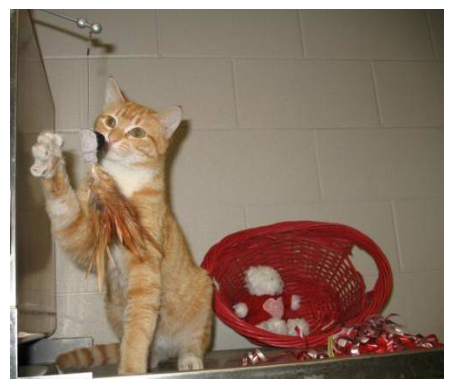

In [19]:
# Accessing and visualizing an image
cat_image_path = os.path.join(train_cats_dir, 'cat.842.jpg')
cat_image = mpimg.imread(cat_image_path)
plt.imshow(cat_image)
plt.axis('off')

(-0.5, 398.5, 299.5, -0.5)

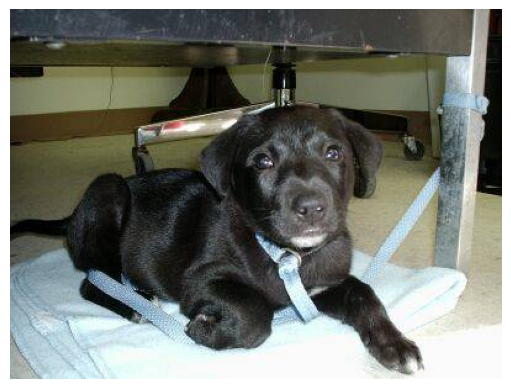

In [20]:
# Accessing and visualizing a dog image
dog_image_path = os.path.join(train_dogs_dir, 'dog.920.jpg')
dog_image = mpimg.imread(dog_image_path)
plt.imshow(dog_image)
plt.axis('off')

In [21]:
print(cat_image_path)
print(dog_image_path)

/content/Data/cats_and_dogs_filtered/train/cats/cat.842.jpg
/content/Data/cats_and_dogs_filtered/train/dogs/dog.920.jpg


In [22]:
# Creating paths to 30 cat and 30 dog images
cat_images = os.listdir(train_cats_dir)[:30]
dog_images = os.listdir(train_dogs_dir)[:30]

cat_image_paths = [os.path.join(train_cats_dir, image) for image in cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in dog_images]

image_paths = cat_image_paths + dog_image_paths
print(len(image_paths))

60


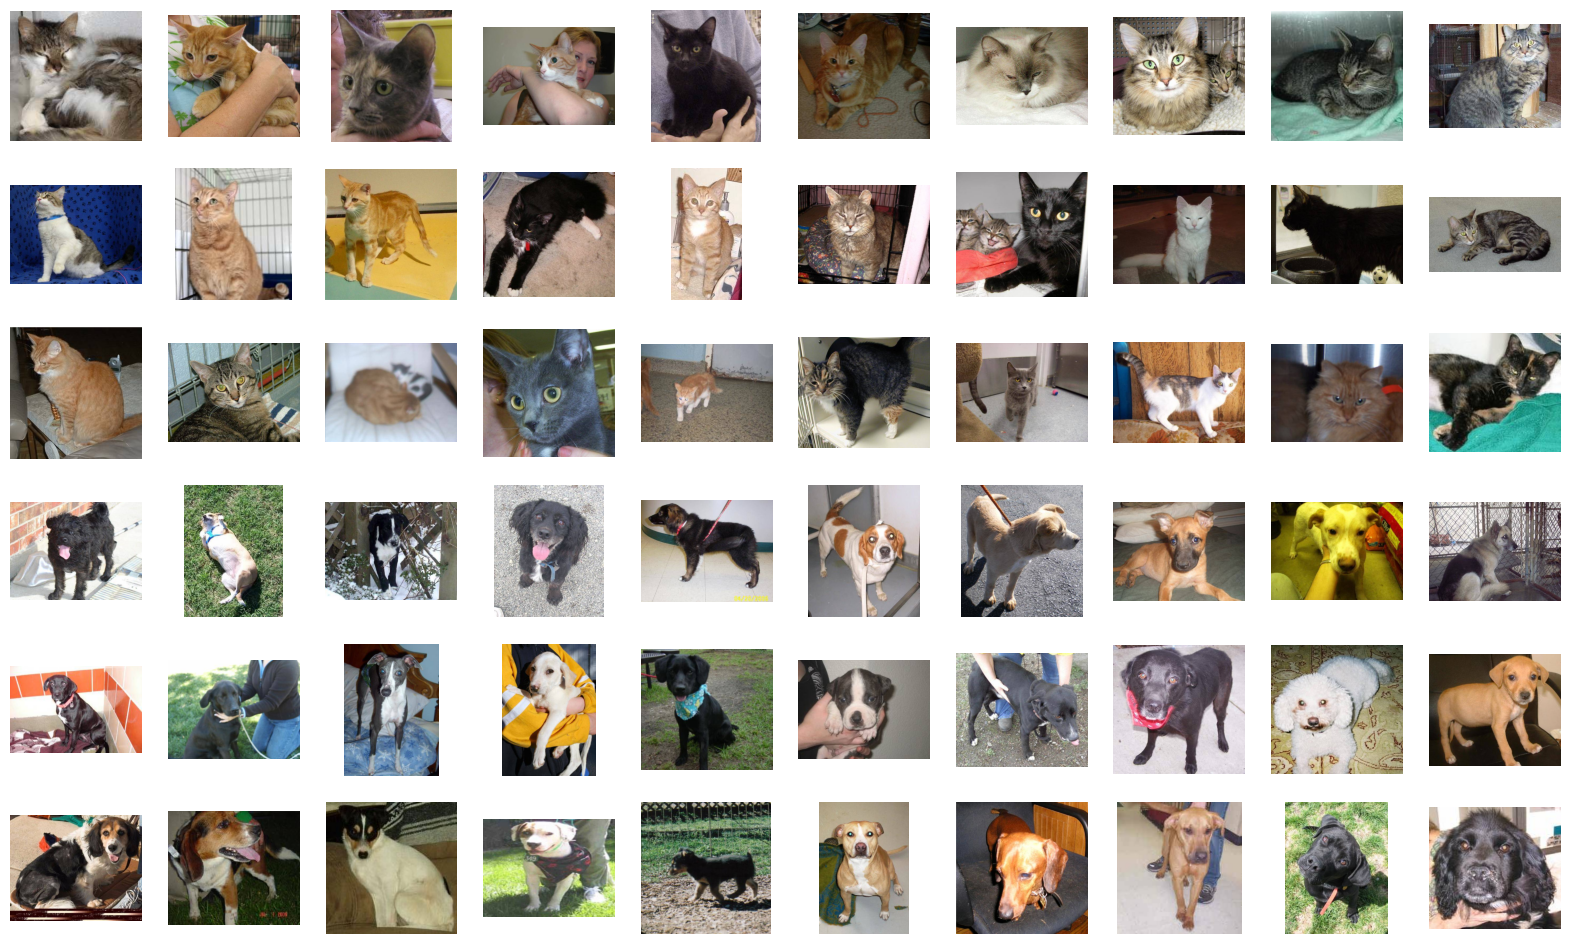

In [23]:
plt.figure(figsize = (20,12))
for i in range(60):
  plt.subplot(6,10,i+1)
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)
  plt.axis('off')



---



---



In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# Flow from directory is used when the data is on secondary storage
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 50,
    target_size = (200,200),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [25]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size = 50,
    target_size = (200,200),
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [26]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/Data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-03-16 04:22:46--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/content/Data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/Data/incep 100%[===================>]  83.84M  22.4MB/s    in 4.8s    

2024-03-16 04:22:52 (17.5 MB/s) - ‘/content/Data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (200,200,3),
                                include_top = False,
                                weights = None)

local_weights_file = '/content/Data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model.load_weights(local_weights_file)


for layer in pre_trained_model.layers:
  layer.trainable = False

In [28]:
model = keras.models.Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              33555456  
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 55359265 (211.18 MB)
Trainable params: 33556481 (128.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [29]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [30]:
history = model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 50,
    verbose = 1
)

Epoch 1/50
40/40 [==============================] - 35s 609ms/step - loss: 9.6348 - accuracy: 0.6990 - val_loss: 0.0553 - val_accuracy: 0.9790
Epoch 2/50
40/40 [==============================] - 24s 595ms/step - loss: 0.2110 - accuracy: 0.9215 - val_loss: 0.0452 - val_accuracy: 0.9830
Epoch 3/50
40/40 [==============================] - 25s 638ms/step - loss: 0.1774 - accuracy: 0.9320 - val_loss: 0.0601 - val_accuracy: 0.9840
Epoch 4/50
40/40 [==============================] - 24s 611ms/step - loss: 0.1619 - accuracy: 0.9385 - val_loss: 0.0613 - val_accuracy: 0.9870
Epoch 5/50
40/40 [==============================] - 24s 609ms/step - loss: 0.1284 - accuracy: 0.9460 - val_loss: 0.0446 - val_accuracy: 0.9820
Epoch 6/50
40/40 [==============================] - 24s 606ms/step - loss: 0.1414 - accuracy: 0.9445 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 7/50
40/40 [==============================] - 25s 631ms/step - loss: 0.1490 - accuracy: 0.9410 - val_loss: 0.0555 - val_accuracy: 0.9860

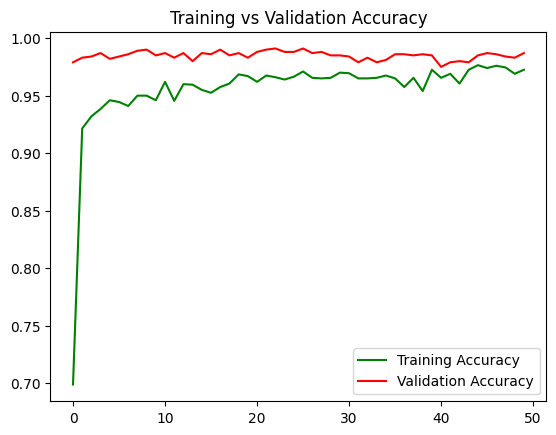

In [33]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(train_acc , color = 'green', label = 'Training Accuracy')
plt.plot(val_acc , color = 'red', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

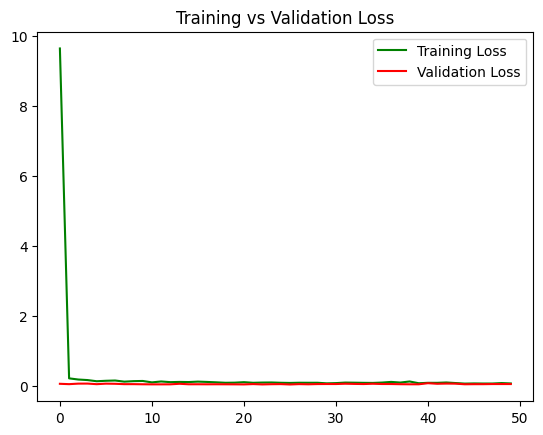

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(train_loss , color = 'green', label = 'Training Loss')
plt.plot(val_loss , color = 'red', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()